In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("Survey_ AI-Chess Puzzle Generation.csv", delimiter=",")

def read_and_filter():
    data = pd.read_csv("Survey_ AI-Chess Puzzle Generation.csv", delimiter=",")
    data = data[[f"Sample {i}" for i in range(1, 11)]]
    data.columns = [*range(1, 11)]
    data = data.fillna(0)

    data = data.replace({"Puzzle 1 is better": 1, "Puzzle 2 is better": 2, "Both are good": 3, "Both are bad": 4})
    return data

read_and_filter()

,1,2,3,4,5,6,7,8,9,10
0,1,2,2,1,2,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0
2,4,1,3,4,3,2,1,1,3,1
3,2,1,0,0,0,0,0,0,0,0
4,1,2,2,4,0,1,0,0,0,0
5,2,1,2,0,2,4,2,2,1,2
6,1,1,1,2,1,2,4,2,1,1
7,1,1,4,2,2,2,2,2,2,3
8,2,1,4,4,2,2,2,1,3,4
9,2,1,4,4,1,0,2,2,2,2


In [12]:
mapper = {
    0: (0, 0),
    1: (1, 0),
    2: (0, 1),
    3: (1, 1),
    4: (-1, -1)
}

def one_hot_encoding(row):
    for sample, val in row[[*range(1, 11)]].items():
        sample = int(sample)
        updates = mapper[val]
        row[f"p{sample * 2 - 1}"] = updates[0]
        row[f"p{sample * 2}"] = updates[1]
    return row

data = read_and_filter()
for row in data.items():
    data = data.apply(one_hot_encoding, axis=1)
data = data.drop([*range(1, 11)], axis=1)
data.columns = [*range(1, 21)]
data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1,-1,1,0,1,1,-1,-1,1,1,0,1,1,0,1,0,1,1,1,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,-1,-1,0,0,1,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,1,0,0,0,1,-1,-1,0,1,0,1,1,0,0,1
6,1,0,1,0,1,0,0,1,1,0,0,1,-1,-1,0,1,1,0,1,0
7,1,0,1,0,-1,-1,0,1,0,1,0,1,0,1,0,1,0,1,1,1
8,0,1,1,0,-1,-1,-1,-1,0,1,0,1,0,1,1,0,1,1,-1,-1
9,0,1,1,0,-1,-1,-1,-1,1,0,0,0,0,1,0,1,0,1,0,1


In [13]:
puzzle_labels = {
    0: "Generated",
    1: "Lichess",
    2: "Chessthetica"
}

puzzles = {
    1: 0,
    2: 1,
    3: 1,
    4: 0,
    5: 2,
    6: 0,
    7: 2,
    8: 2,
    9: 0,
    10: 1,
    11: 0,
    12: 2,
    13: 0,
    14: 2,
    15: 1,
    16: 0,
    17: 1,
    18: 1,
    19: 1,
    20: 2
}

results = {
    0: 0,
    1: 0,
    2: 0
}

total = data.sum()

for i, val in total.items():
    results[puzzles[i]] += val

{puzzle_labels[k]: round(v, 2) for k, v in results.items()}

{'Generated': 26, 'Lichess': 43, 'Chessthetica': -8}

In [30]:
print(data[[k for k, v in puzzles.items() if v == 0]].sum().values)
print(data[[k for k, v in puzzles.items() if v == 1]].sum().values)
print(data[[k for k, v in puzzles.items() if v == 2]].sum().values)

[5 7 4 4 0 0 6]
[6 7 8 5 8 5 4]
[ 1 -7 -6  1  1  2]


In [24]:
data[[k for k, v in puzzles.items() if v == 1]].sum().values

array([6, 7, 8, 5, 8, 5, 4], dtype=int64)

In [27]:
data[[k for k, v in puzzles.items() if v == 2]].sum().values

array([ 1, -7, -6,  1,  1,  2], dtype=int64)

In [28]:
import matplotlib.pyplot as plt

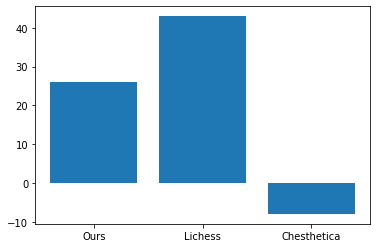

In [37]:
plt.bar(["Ours", "Lichess", "Chesthetica"], [26, 43, -8])
plt.show()